In [1]:
import pandas as pd
import numpy as np
import json
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from fa2 import ForceAtlas2
import community

In [2]:
with open("Data/starwars_vader_split.json") as f:
    starwars_json = json.load(f)

In [3]:
movies = ["Star Wars: Episode I The Phantom Menice", "Star Wars: Episode II Attack of the Clones",
        "Star Wars: The Clone Wars (film)", "Star Wars: Episode III Revenge of the Sith",
        "Solo: A Star Wars Story", "Rogue One: A Star Wars Story", "Star Wars: Episode IV A New Hope",
        "Star Wars: Episode V The Empire Strikes Back", "Star Wars: Episode VI Return of the Jedi",
        "Star Wars: Episode VII The Force Awakens", "Star Wars: Episode VIII The Last Jedi"]

animated_series_names = ["Star Wars: The Clone Wars (series)", "Star Wars Rebels"]

original_trilogy = movies[6:9]

use = original_trilogy


use = [movies[6]]#("series", animated_series_names[0])]


In [21]:
DG = nx.DiGraph()
# Create and add nodes
exclude_from_nodes = set(["canon", "hologram"])
nodes = []
# for m in use:
#     if m[0] == "series":
#         for e in starwars_json["data"][m[0]][m[1]].keys():
#             nodes.extend(starwars_json["data"][m[0]][m[1]][e]["characters"])
# nodes = list(set(nodes).difference(set(starwars_json["failed"]["characters"].keys())))
nodes = list(set(starwars_json["data"]["characters"].keys()).difference(set(starwars_json["failed"]["characters"].keys()).union(exclude_from_nodes)))
for n in nodes:
#     if n == "Darth Vader":
#         print starwars_json["data"]["characters"][n]
    movies = [x for x in starwars_json["data"]["movies"].keys() if n in starwars_json["data"]["movies"][x]["characters"]]
    series = defaultdict(list)
    for s in starwars_json["data"]["series"].keys():
        for e in starwars_json["data"]["series"][s]:
            if n in starwars_json["data"]["series"][s][e]["characters"]:
                series[s].append(e)
    attribute = {"movies": movies, "series": series, "affiliations": starwars_json["data"]["characters"][n]["affiliations"]}
    DG.add_node(n, data=attribute)
    
# Create links between nodes
for n in nodes:
    links = list(set(starwars_json["data"]["characters"][n]["connections"]).difference(set(starwars_json["failed"]["characters"].keys()).union(exclude_from_nodes)))
    if len(links) > 0:
        for l in links:
            DG.add_edge(n, l)


In [8]:
# Setup for the force atlas algorithm.
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=0.001,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.012,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.02,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

# Create an undirected version of the graph
G = DG.to_undirected()

# Calculate node positions with the force atlas algorithm using the undirected graph
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=20000)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [3:43:33<00:00,  1.45it/s]


('BarnesHut Approximation', ' took ', '252.02', ' seconds')
('Repulsion forces', ' took ', '13032.60', ' seconds')
('Gravitational forces', ' took ', '2.98', ' seconds')
('Attraction forces', ' took ', '10.81', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '12.62', ' seconds')


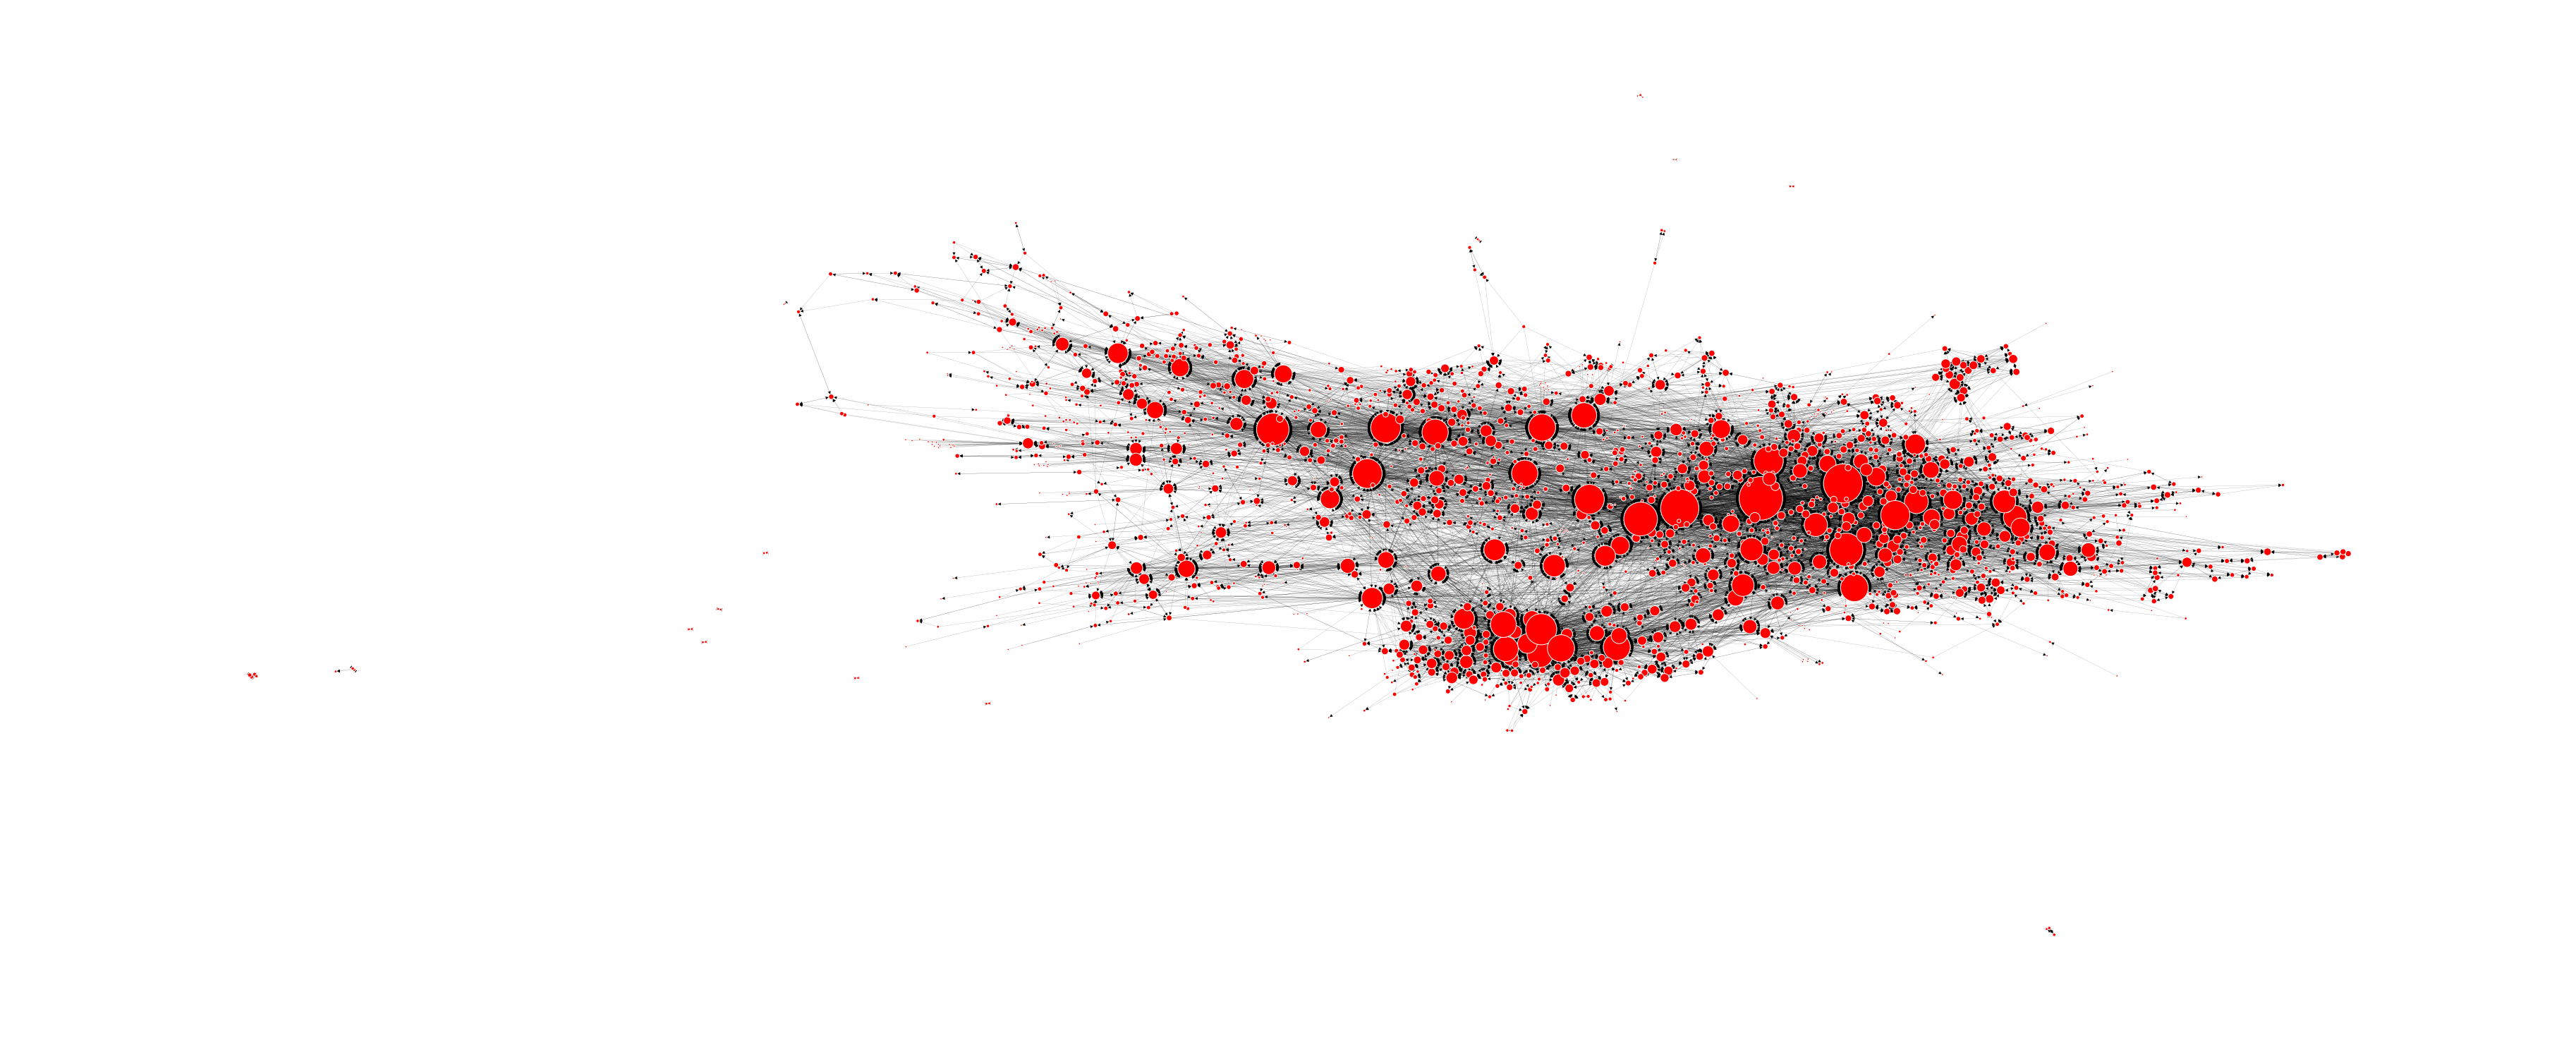

In [25]:
nodes = DG.nodes(data=True)
nodes_2, degrees = zip(*DG.degree())

# node size proportional to the degree
node_sizes_deg = [7*x for x in degrees]

# # Color according to the party
# node_colors = ['r' if x[1]['party'] == "Republican" else "b" for x in nodes]
# nx.draw(DG, positions, node_color=node_colors, node_size=node_sizes_deg, with_labels=False, edgecolors="white", edge_color='k', width=0.1)
plt.figure(figsize=(50,20))
nx.draw(DG, positions, node_color='red', node_size=node_sizes_deg, with_labels=False, edgecolors="white", edge_color='k', width=0.1)
plt.savefig("Data/Figures/network.png")

In [14]:
nodes = DG.nodes(data=True)
nodes_2, degrees = zip(*DG.degree())

df = pd.DataFrame(data=dict(name=nodes_2, degree=degrees))

df = df.sort_values(by="degree", ascending=False)
print len(set(df.name.values))

1948


In [24]:
print df[:20]
starwars_json["data"]["characters"]["canon"]

      degree              name
753      545  Anakin Skywalker
886      437    Obi-Wan Kenobi
686      421       Darth Vader
1762     327     Darth Sidious
371      318       Ahsoka Tano
369      303          Han Solo
1460     278      Ezra Bridger
710      257    Luke Skywalker
1725     253             R2-D2
613      251       Leia Organa
28       249     Padmé Amidala
1461     244             Dooku
508      221               Rex
826      211             canon
1852     211       Sabine Wren
625      209      Kanan Jarrus
30       198             C-3PO
1131     198         Chewbacca
736      193            C1-10P
1568     192     Hera Syndulla


{u'affiliations': [],
 u'connections': [],
 u'wikicontent': u'{{Eras|real|sprot|type=canon}}\n[[File:Canon.png|thumb|right|350px|\'\'[[Star Wars]]\'\' [[opening crawl]] tagline found on canon adult fiction novels published by [[Del Rey]]]]\n\'\'\'\'\'Star Wars\'\' canon\'\'\' was first defined in the [[Star Wars Insider 23|first issue]] of the [[Lucasfilm Ltd.|Lucasfilm]] magazine, \'\'[[Star Wars Insider]]\'\':\n\n:"\'\'Gospel,\' or canon as we refer to it, includes the screenplays, the films, the radio dramas and the novelizations. These works spin out of [[George Lucas]]\' original stories, the rest are written by other writers. However, between us, we\'ve read everything, and much of it is taken into account in the overall continuity. The entire catalog of published works comprises a vast history&mdash;with many off-shoots, variations and tangents&mdash;like any other well-developed mythology.\'\'"\n\nTo understand [[Wikipedia:Canon (fiction)|canon]] and [[Wikipedia:Continuity (fic

In [10]:
pos_json = {}

for p in positions.keys():
    pos_json[p] = list(positions[p])
    
with open("Data/starwars_network_pos_vader_0p02.json", 'w') as f:
    json.dump(pos_json, f)

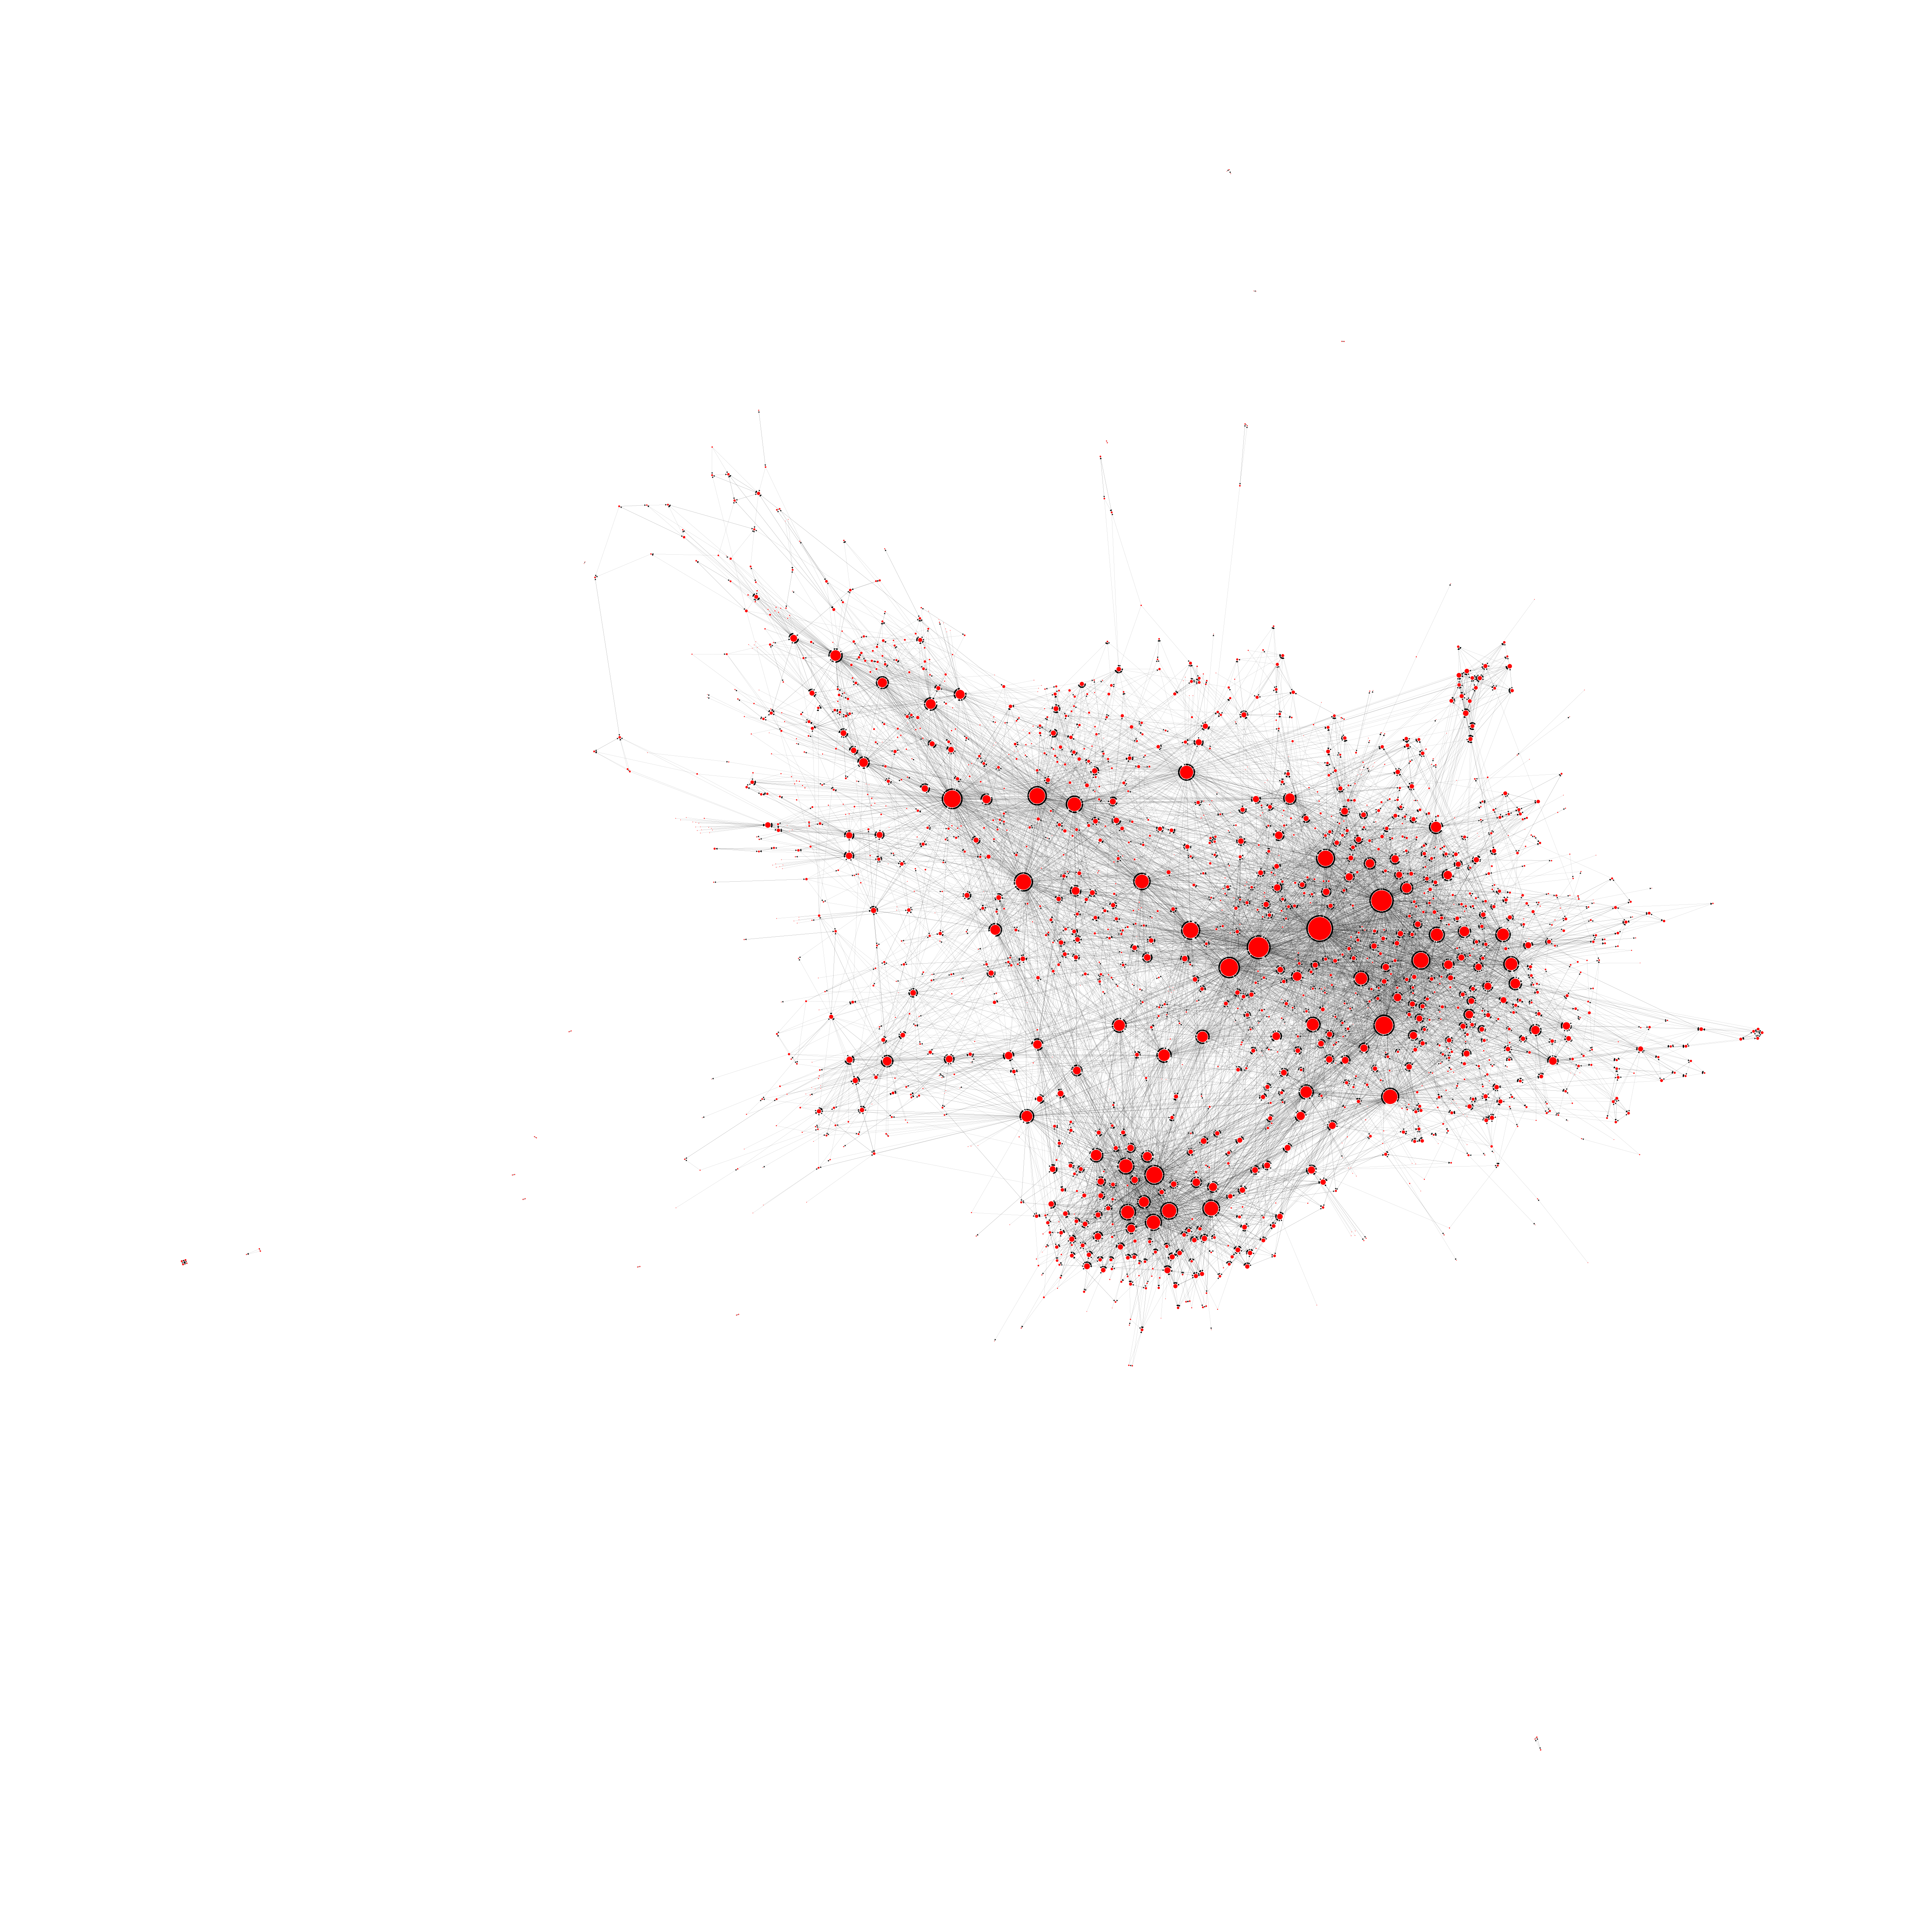

In [34]:
with open("Data/starwars_network_pos_vader_0p02.json", 'r') as f:
    positions = json.load(f)

nodes = DG.nodes(data=True)
nodes_2, degrees = zip(*DG.degree())

# node size proportional to the degree
node_sizes_deg = [7*x for x in degrees]

# # Color according to the party
# node_colors = ['r' if x[1]['party'] == "Republican" else "b" for x in nodes]
# nx.draw(DG, positions, node_color=node_colors, node_size=node_sizes_deg, with_labels=False, edgecolors="white", edge_color='k', width=0.1)
plt.figure(figsize=(70,70))
nx.draw(DG, positions, node_color='red', node_size=node_sizes_deg, with_labels=False, edgecolors="white", edge_color='k', width=0.1)
plt.savefig("Data/network_layout_vader.png")

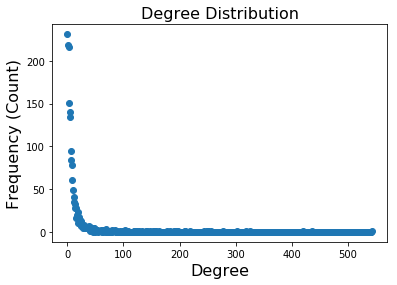

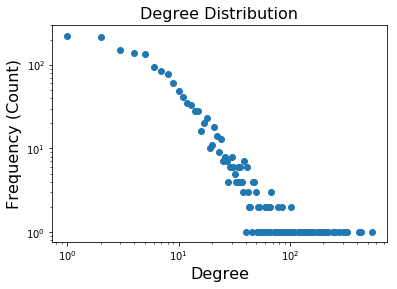

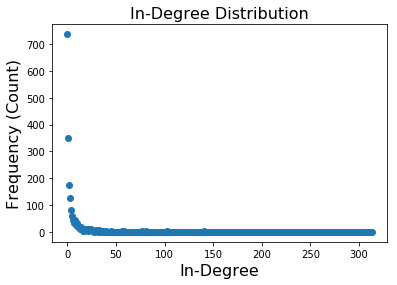

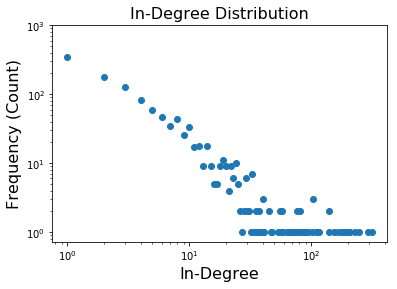

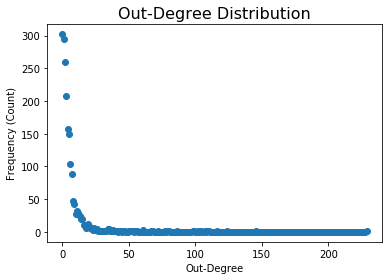

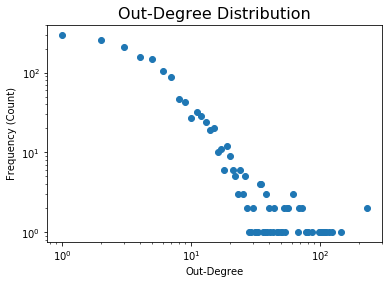

In [35]:
degree = zip(*DG.degree())[1]
in_degree = zip(*DG.in_degree())[1]
out_degree = zip(*DG.out_degree())[1]


bins = np.arange(min(degree), max(degree)+1)
hist, bins = np.histogram(degree, bins=bins)

plt.figure()
plt.scatter(bins[:-1], hist)
plt.xlabel("Degree", fontsize=16)
plt.ylabel("Frequency (Count)", fontsize=16)
plt.title("Degree Distribution", fontsize=16)


plt.figure()
plt.loglog(bins[:-1], hist, 'o')
plt.xlabel("Degree", fontsize=16)
plt.ylabel("Frequency (Count)", fontsize=16)
plt.title("Degree Distribution", fontsize=16)
plt.savefig("Data/Figures/degree_distribution.png")


in_bins = np.arange(min(in_degree), max(in_degree)+1)
in_hist, in_bins = np.histogram(in_degree, bins=in_bins)

plt.figure()
plt.scatter(in_bins[:-1], in_hist)
plt.xlabel("In-Degree", fontsize=16)
plt.ylabel("Frequency (Count)", fontsize=16)
plt.title("In-Degree Distribution", fontsize=16)

plt.figure()
plt.loglog(in_bins[:-1], in_hist, 'o')
plt.xlabel("In-Degree", fontsize=16)
plt.ylabel("Frequency (Count)", fontsize=16)
plt.title("In-Degree Distribution", fontsize=16)
plt.savefig("Data/Figures/in_degree_distribution.png")


out_bins = np.arange(min(out_degree), max(out_degree)+1)
out_hist, out_bins = np.histogram(out_degree, bins=out_bins)

plt.figure()
plt.scatter(out_bins[:-1], out_hist)
plt.xlabel("Out-Degree")
plt.ylabel("Frequency (Count)")
plt.title("Out-Degree Distribution", fontsize=16)

plt.figure()
plt.loglog(out_bins[:-1], out_hist, 'o')
plt.xlabel("Out-Degree")
plt.ylabel("Frequency (Count)")
plt.title("Out-Degree Distribution", fontsize=16)
plt.savefig("Data/Figures/out_degree_distribution.png")

degree_dist_json = {"data": {"In_Degree": {"bins": [float(x) for x in bins[:-1]], "hist": [float(x) for x in hist]},
                             "Out_Degree": {"bins": [float(x) for x in out_bins[:-1]], "hist": [float(x) for x in out_hist]},
                             "Degree": {"bins": [float(x) for x in in_bins[:-1]], "hist": [float(x) for x in in_hist]}}}

with open("Data/degree_distribution.json", 'w') as f:
    json.dump(degree_dist_json, f)

In [5]:
G = DG.to_undirected()
partition = community.best_partition(G)

nodes = DG.nodes(data=True)
nodes_2, degrees = zip(*DG.degree())
# node size proportional to the degree
node_sizes_deg = [7*x for x in degrees]

plt.figure(figsize=(30, 30))
node_colors = [partition[n[0]] for n in nodes]
coms = np.unique(node_colors)
cmap = plt.get_cmap("jet")
node_colors = [cmap(n/float(max(coms))) for n in node_colors]
# print node_colors


# nx.draw(DG, positions, node_color=node_colors, node_size=node_sizes_deg, with_labels=False, edgecolors="white", edge_color='k', width=0.1)

<Figure size 2160x2160 with 0 Axes>

In [10]:
affiliations = set([])

affil = [set(starwars_json["data"]["characters"][x[0]]["affiliations"]) for x in nodes]
# print starwars_json["data"]["characters"]["Yoda"]["affiliations"]
for a in affil:
    affiliations = affiliations.union(a)
affiliations = list(affiliations)
print len(affiliations)

B = len(affiliations)
C = len(coms)
G = DG.to_undirected()

D_list = [[] for x in range(B)]
for b in range(B):
    for com in coms:
        list_nodes = [n for n in partition.keys()
                                if partition[n] == com]
        list_nodes = [n for n in list_nodes if affiliations[b] in starwars_json["data"]["characters"][n]["affiliations"]]
        D_list[b].append(len(list_nodes))

D = np.matrix(D)

D_json = {"data": {"matrix": []}}
for b in range(B):
    D_json["data"]["matrix"].append(D_list[b])

with open("Data/confusion_matrix.json", 'w') as f:
    json.dump(D_json, f)

258


In [ ]:
# print D.diagonal()
fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
print B
print C
steps = 43.0
steps2 = 31.0
for i in range(1, int(B/steps)+1):
    for j in range(1, int(C/steps2)+1):
#         print (i-1)*int(steps), " - ", min(i*int(steps),B)-1
#         print (j-1)*int(steps2), " - ", min(j*int(steps2),C)-1
        
        fig = plt.figure(figsize=(10,10))
        plt.imshow(D[(i-1)*int(steps):min(i*int(steps),B), (j-1)*int(steps2):min(j*int(steps2),C)], cmap=plt.get_cmap("gist_rainbow"))
        plt.yticks(np.linspace(0, steps-1, 10), np.linspace((i-1)*int(steps), min(i*int(steps),B)-1, 10))
        plt.savefig("ConfusionMatrix/Conf_mat_{0}_{1}.png".format(i, j))
        
# ax2 = fig.add_subplot(122)
# # 'nearest' interpolation - faithful but blocky
# ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)
#plt.colorbar(orientation='horizontal')
# plt.savefig("Conf_Matrix.png")
# plt.show()

258
248


<Figure size 720x720 with 0 Axes>

In [7]:
# print D.diagonal()
fig = plt.figure(figsize=(10,10))
# ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
print B
print C
steps = 6.0
steps2 = 8.0
for i in range(1, int(B/steps)+1):
    for j in range(1, int(C/steps2)+1):
#         print (i-1)*int(steps), " - ", min(i*int(steps),B)-1
#         print (j-1)*int(steps2), " - ", min(j*int(steps2),C)-1
        
        fig = plt.figure(figsize=(10,10))
        plt.imshow(D[(i-1)*int(steps):min(i*int(steps),B), (j-1)*int(steps2):min(j*int(steps2),C)], cmap=plt.get_cmap("gist_rainbow"))
        plt.yticks(range(int(steps)), [x for x in affiliations[(i-1)*int(steps):min(i*int(steps),B)]])
        
        plt.savefig("ConfusionMatrix/Conf_mat_{0}_{1}.png".format(i, j))
        plt.close()
        
# ax2 = fig.add_subplot(122)
# # 'nearest' interpolation - faithful but blocky
# ax2.imshow(a, interpolation='nearest', cmap=cm.Greys_r)
#plt.colorbar(orientation='horizontal')
# plt.savefig("Conf_Matrix.png")
# plt.show()

258
248


<Figure size 720x720 with 0 Axes>

In [12]:
for s in starwars_json["data"]["series"].keys():
    print s, ":", len(starwars_json["data"]["series"][s].keys())

Star Wars Rebels : 66
Star Wars: The Clone Wars (series) : 129


In [13]:
print len(DG.nodes())
print len(DG.edges())

1948
12522


In [31]:
affiliations = []
for c in starwars_json["data"]["characters"].keys():
    try:
        affiliations.extend(starwars_json["data"]["characters"][c]["affiliations"])
    except:
        print c

    
affiliations = list(set(affiliations))
with open("Data/affiliatons.txt", 'w') as f:
        f.write('\n'.join(affiliations))
        
with open("Data/characters.txt", 'w') as f:
    f.write('\n'.join([x.encode('utf-8') for x in starwars_json["data"]["characters"].keys()]))

Vamasto Maja
NP-G1
Unidentified Mandalorian Minister of the Interior
Dezine Krisso
Unidentified Ming Po trainer
DA1-4XB
FD3-MN
Tarubo Bunzo
P1-SZE
Unidentified Mandalorian Minister of Finance
W1-EG5
Tregga/Canon
CM-3XB
Dhowar Repareed
WED-021
WG-22
C26-T
Unidentified gambler (Vandor-1)
C00-L05C
Sablix Veen
Unidentified DRK-1 probe droid
Unidentified Twi'lek Child (Onderon)
Unidentified Separatist/Canon
Kenholdt Ransard
GB-BD
Tordich Envlo
Yirpa Garajon
Blawz
Unidentified ranking Green Squadron member (Atollon)
Unidentified First Light skipper


In [32]:

nodes = DG.nodes(data=True)
nodes_2, degrees = zip(*DG.degree())



deg_cent = nx.degree_centrality(DG)
degree_centrality = [deg_cent[n] for n in nodes_2]

eig_cent = nx.eigenvector_centrality(DG)
eigenvector_centrality = [eig_cent[n] for n in nodes_2]

df = pd.DataFrame(data=dict(name=nodes_2, degree=degrees, 
                            degree_centrality=degree_centrality,
                           eigenvector_centrality=eigenvector_centrality))

from IPython.display import display, HTML

df = df.sort_values(by="degree", ascending=False)
print "10 highest degree"
display(HTML(df[["name", "degree"]][:10].to_html(index=False)))

df = df.sort_values(by="degree_centrality", ascending=False)
print "10 highest degree centrality"
display(HTML(df[["name", "degree_centrality"]][:10].to_html(index=False)))

df = df.sort_values(by="eigenvector_centrality", ascending=False)
print "10 highest eigenvector centrality"
display(HTML(df[["name", "eigenvector_centrality"]][:10].to_html(index=False)))

10 highest degree


10 highest degree centrality


10 highest eigenvector centrality
